# ‚ö° CHALLENGE TELECOM X_PARTE 2

In [3]:
import pandas as pd
data=pd.read_csv('datos_tratados.csv')
data

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0     0002-ORFBO    No  Female              0     Yes        Yes       9   
1     0003-MKNFE    No    Male              0      No         No       9   
2     0004-TLHLJ   Yes    Male              0      No         No       4   
3     0011-IGKFF   Yes    Male              1     Yes         No      13   
4     0013-EXCHZ   Yes  Female              1     Yes         No       3   
...          ...   ...     ...            ...     ...        ...     ...   
7262  9987-LUTYD    No  Female              0      No         No      13   
7263  9992-RRAMN   Yes    Male              0     Yes         No      22   
7264  9992-UJOEL    No    Male              0      No         No       2   
7265  9993-LHIEB    No    Male              0     Yes        Yes      67   
7266  9995-HOTOH    No    Male              0     Yes        Yes      63   

     PhoneService MultipleLines InternetService  ... DeviceProtection  \
0             Yes            No             DSL  ...               No   
1             Yes           Yes             DSL  ...               No   
2             Yes            No     Fiber optic  ...              Yes   
3             Yes            No     Fiber optic  ...              Yes   
4             Yes            No     Fiber optic  ...               No   
...           ...           ...             ...  ...              ...   
7262          Yes            No             DSL  ...               No   
7263          Yes           Yes     Fiber optic  ...               No   
7264          Yes            No             DSL  ...               No   
7265          Yes            No             DSL  ...              Yes   
7266           No            No             DSL  ...              Yes   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0            Yes         Yes              No        One year              Yes   
1             No          No             Yes  Month to month               No   
2             No          No              No  Month to month              Yes   
3             No         Yes             Yes  Month to month              Yes   
4            Yes         Yes              No  Month to month              Yes   
...          ...         ...             ...             ...              ...   
7262         Yes          No              No        One year               No   
7263          No          No             Yes  Month to month              Yes   
7264          No          No              No  Month to month              Yes   
7265         Yes          No             Yes        Two year               No   
7266          No         Yes             Yes        Two year               No   

         PaymentMethod Charges.Monthly Charges.Total  Cuentas.Diarias  
0         Mailed check           65.60        593.30            65.60  
1         Mailed check           59.90        542.40            59.90  
2     Electronic check           73.90        280.85            73.90  
3     Electronic check           98.00       1237.85            98.00  
4         Mailed check           83.90        267.40            83.90  
...                ...             ...           ...              ...  
7262      Mailed check           55.15        742.90            55.15  
7263  Electronic check           85.10       1873.70            85.10  
7264      Mailed check           50.30         92.75            50.30  
7265      Mailed check           67.85       4627.65            67.85  
7266  Electronic check           59.00       3707.60            59.00  

[7267 rows x 22 columns]

## ‚úÖ Encoding
Transforma las variables categ√≥ricas a formato num√©rico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un m√©todo de codificaci√≥n adecuado, como one-hot encoding.

In [4]:
# Seleccionamos las columnas categ√≥ricas
col_categorica = data.select_dtypes(include=['object']).columns.tolist()

# Excluimos 'customerID'
col_categorica.remove('customerID')

# Aplicamos one-hot encoding
codificacion_dato = pd.get_dummies(data, columns=col_categorica, drop_first=True)

# Mostramos el resultado
display(codificacion_dato.head())

customerID  SeniorCitizen  tenure  Charges.Monthly  Charges.Total  \
0  0002-ORFBO              0       9             65.6         593.30   
1  0003-MKNFE              0       9             59.9         542.40   
2  0004-TLHLJ              0       4             73.9         280.85   
3  0011-IGKFF              1      13             98.0        1237.85   
4  0013-EXCHZ              1       3             83.9         267.40   

   Cuentas.Diarias  Churn_Yes  gender_Male  Partner_Yes  Dependents_Yes  ...  \
0             65.6      False        False         True            True  ...   
1             59.9      False         True        False           False  ...   
2             73.9       True         True        False           False  ...   
3             98.0       True         True         True           False  ...   
4             83.9       True        False         True           False  ...   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                            False             True   
1                            False            False   
2                            False            False   
3                            False             True   
4                            False             True   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                False                False   
1                                False                 True   
2                                False                False   
3                                False                 True   
4                                False                False   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0               True              False                  True   
1              False              False                 False   
2              False              False                  True   
3              False              False                  True   
4              False              False                  True   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                           False   
1                                  False                           False   
2                                  False                            True   
3                                  False                            True   
4                                  False                           False   

   PaymentMethod_Mailed check  
0                        True  
1                        True  
2                       False  
3                       False  
4                        True  

[5 rows x 32 columns]

### Verificaci√≥n de la Proporci√≥n de Cancelaci√≥n (Churn)
Calcula la proporci√≥n de clientes que cancelaron en relaci√≥n con los que permanecieron activos. Eval√∫a si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el an√°lisis de los resultados.

In [5]:
# Calculamos el conteo de valores para la columna 'Churn_Yes'
churn_conteo = codificacion_dato['Churn_Yes'].value_counts()

# Calculamos la proporci√≥n de clientes que cancelaron
churn_proporcion = churn_conteo[True] / len(codificacion_dato)

# Relizamos la muestra de los conteos y la proporci√≥n
print("Conteo de clientes por estado de cancelaci√≥n:")
print(churn_conteo)
print(f"\nProporci√≥n de clientes que cancelaron (Churn): {churn_proporcion:.2f}")

# Evaluamos si existe un desbalance de clases
if churn_proporcion < 0.3 or churn_proporcion > 0.7:
    print("\nAdvertencia: Existe un desbalance significativo en las clases.")
else:
    print("\nNo hay un desbalance significativo en las clases.")

Conteo de clientes por estado de cancelaci√≥n:
Churn_Yes
False    5398
True     1869
Name: count, dtype: int64

Proporci√≥n de clientes que cancelaron (Churn): 0.26

Advertencia: Existe un desbalance significativo en las clases.


### ‚öñ Balanceo de Clases (opcional)
Si deseas profundizar en el an√°lisis, aplica t√©cnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser √∫tiles para generar ejemplos sint√©ticos de la clase minoritaria.

In [6]:
#Instalamos librer√≠a para aplicar SMOTE y balancear
!pip install imbalanced-learn

Una vez instalada la librer√≠a, podemos aplicar SMOTE. Primero, separaremos las caracter√≠sticas y la variable objetivo.
(En este caso sali√≥ error por que hab√≠an valores nan y pasamos a corregir mas abajo)

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separamos caracter√≠sticas (X) y variable objetivo (y)
# Eliminamos 'customerID' ya que no es una caracter√≠stica para el modelo
X = codificacion_dato.drop(['Churn_Yes', 'customerID'], axis=1)
y = codificacion_dato['Churn_Yes']

# Aplicar SMOTE para balancear la clase minoritaria (clientes que cancelaron)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Verificar el balanceo de clases despu√©s de aplicar SMOTE
print("Conteo de clientes por estado de cancelaci√≥n despu√©s de SMOTE:")
print(y_res.value_counts())

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [8]:
# Verificamos si hay valores faltantes en el DataFrame X
valores_faltantes = X.isnull().sum()

# Filtramos las columnas que tienen valores faltantes
columnas_con_nan = valores_faltantes[valores_faltantes > 0]

# Mostramos el conteo de valores faltantes por columna
print("Conteo de valores faltantes por columna:")
print(columnas_con_nan)

# Mostramos el total de valores faltantes en todo el DataFrame X
total_nan = columnas_con_nan.sum()
print(f"\nTotal de valores faltantes en X: {total_nan}")

# Mostramos la proporci√≥n de valores faltantes si existen
if total_nan > 0:
    proporcion_nan = total_nan / X.size
    print(f"Proporci√≥n total de valores faltantes en X: {proporcion_nan:.4f}")

Conteo de valores faltantes por columna:
Charges.Total    11
dtype: int64

Total de valores faltantes en X: 11
Proporci√≥n total de valores faltantes en X: 0.0001


Primero, eliminaremos las filas con valores faltantes en el conjunto de datos.

In [9]:
# Eliminamos filas con valores faltantes en X y y
X_cleaned = X.dropna()
y_cleaned = y[X_cleaned.index] # Aseguramos que y_cleaned corresponda a las filas restantes en X_cleaned

print(f"N√∫mero de filas originales: {len(X)}")
print(f"N√∫mero de filas despu√©s de eliminar faltantes: {len(X_cleaned)}")

N√∫mero de filas originales: 7267
N√∫mero de filas despu√©s de eliminar faltantes: 7256


Ahora que hemos eliminado los valores faltantes, aplicaremos SMOTE para balancear las clases.

In [10]:
from imblearn.over_sampling import SMOTE

# Aplicamos SMOTE para balancear la clase minoritaria (clientes que cancelaron)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_cleaned, y_cleaned)

# Verificamos el balanceo de clases despu√©s de aplicar SMOTE
print("Conteo de clientes por estado de cancelaci√≥n despu√©s de SMOTE:")
print(y_res.value_counts())

Conteo de clientes por estado de cancelaci√≥n despu√©s de SMOTE:
Churn_Yes
False    5387
True     5387
Name: count, dtype: int64


### ‚ùó Normalizaci√≥n o Estandarizaci√≥n (si es necesario)
Eval√∫a la necesidad de normalizar o estandarizar los datos, seg√∫n los modelos que se aplicar√°n. Modelos basados en distancia, como KNN, SVM, Regresi√≥n Log√≠stica y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en √°rboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

#### 1. Dividir los datos
Dividiremos el conjunto de datos balanceado (`X_res`, `y_res`) en conjuntos de entrenamiento y prueba.

In [11]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

print(f"Tama√±o del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tama√±o del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tama√±o de las etiquetas de entrenamiento (y_train): {y_train.shape}")
print(f"Tama√±o de las etiquetas de prueba (y_test): {y_test.shape}")

Tama√±o del conjunto de entrenamiento (X_train): (8619, 30)
Tama√±o del conjunto de prueba (X_test): (2155, 30)
Tama√±o de las etiquetas de entrenamiento (y_train): (8619,)
Tama√±o de las etiquetas de prueba (y_test): (2155,)


#### 2. Escalamos los datos (para Regresi√≥n Log√≠stica)
Aplicaremos `StandardScaler` a las caracter√≠sticas de entrenamiento y prueba. Este paso es necesario para modelos basados en distancia como la Regresi√≥n Log√≠stica.

In [12]:
from sklearn.preprocessing import StandardScaler

# Inicializamos el escalador
scaler = StandardScaler()

# Ajustamos el escalador solo con los datos de entrenamiento y transformar ambos conjuntos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nDatos de entrenamiento escalados (primeras 5 filas):")
display(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())

print("\nDatos de prueba escalados (primeras 5 filas):")
display(pd.DataFrame(X_test_scaled, columns=X_test.columns).head())


Datos de entrenamiento escalados (primeras 5 filas):


SeniorCitizen    tenure  Charges.Monthly  Charges.Total  Cuentas.Diarias  \
0       2.504679  1.066633         0.535519       1.057823         0.535519   
1      -0.399253 -0.357647         0.739173      -0.163447         0.739173   
2       2.504679  0.145040         0.528411       0.207735         0.528411   
3      -0.399253  0.228821         1.238156       0.651882         1.238156   
4      -0.399253  1.694991         0.760036       1.800253         0.760036   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0    -1.169276     0.996872       -0.647843          0.298698   
1    -1.169276     0.996872        1.543584          0.298698   
2     0.855230    -1.003138       -0.647843          0.298698   
3    -1.169276     0.996872        1.543584          0.298698   
4    -1.169276     0.996872       -0.647843          0.298698   

   MultipleLines_Yes  ...  StreamingTV_No internet service  StreamingTV_Yes  \
0           1.037481  ...                         -0.44712         1.118209   
1           1.037481  ...                         -0.44712        -0.894287   
2           1.037481  ...                         -0.44712         1.118209   
3           1.037481  ...                         -0.44712         1.118209   
4           1.037481  ...                         -0.44712         1.118209   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                             -0.44712             1.110361   
1                             -0.44712             1.110361   
2                             -0.44712             1.110361   
3                             -0.44712             1.110361   
4                             -0.44712            -0.900608   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0           2.053610          -0.459580              0.661406   
1           2.053610          -0.459580              0.661406   
2           2.053610          -0.459580              0.661406   
3           2.053610          -0.459580              0.661406   
4          -0.486947           2.175898              0.661406   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                              -0.528359                        1.027409   
1                              -0.528359                       -0.973322   
2                               1.892653                        1.027409   
3                              -0.528359                       -0.973322   
4                              -0.528359                       -0.973322   

   PaymentMethod_Mailed check  
0                   -0.556667  
1                   -0.556667  
2                   -0.556667  
3                    1.796405  
4                   -0.556667  

[5 rows x 30 columns]


Datos de prueba escalados (primeras 5 filas):


SeniorCitizen    tenure  Charges.Monthly  Charges.Total  Cuentas.Diarias  \
0       2.504679  1.150414         1.109498       1.587278         1.109498   
1       2.504679 -1.111678        -0.862094      -0.916211        -0.862094   
2      -0.399253  0.019368        -0.284873      -0.178172        -0.284873   
3       2.504679 -0.986006         0.733957      -0.777480         0.733957   
4      -0.399253  1.862554         1.321610       2.521300         1.321610   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0    -1.169276    -1.003138       -0.647843          0.298698   
1     0.855230    -1.003138       -0.647843         -3.347867   
2    -1.169276    -1.003138       -0.647843          0.298698   
3    -1.169276    -1.003138       -0.647843          0.298698   
4     0.855230     0.996872        1.543584          0.298698   

   MultipleLines_Yes  ...  StreamingTV_No internet service  StreamingTV_Yes  \
0           1.037481  ...                         -0.44712         1.118209   
1          -0.963873  ...                         -0.44712        -0.894287   
2          -0.963873  ...                         -0.44712        -0.894287   
3           1.037481  ...                         -0.44712         1.118209   
4           1.037481  ...                         -0.44712         1.118209   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                             -0.44712             1.110361   
1                             -0.44712             1.110361   
2                             -0.44712            -0.900608   
3                             -0.44712            -0.900608   
4                             -0.44712            -0.900608   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0           2.053610          -0.459580              0.661406   
1          -0.486947          -0.459580              0.661406   
2           2.053610          -0.459580              0.661406   
3          -0.486947          -0.459580              0.661406   
4          -0.486947           2.175898              0.661406   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                              -0.528359                        1.027409   
1                              -0.528359                        1.027409   
2                              -0.528359                        1.027409   
3                              -0.528359                        1.027409   
4                               1.892653                       -0.973322   

   PaymentMethod_Mailed check  
0                   -0.556667  
1                   -0.556667  
2                   -0.556667  
3                   -0.556667  
4                   -0.556667  

[5 rows x 30 columns]

## üéØ Correlaci√≥n y Selecci√≥n de Variables

### „ÄΩ An√°lisis de Correlaci√≥n
Visualiza la matriz de correlaci√≥n para identificar relaciones entre las variables num√©ricas. Presta especial atenci√≥n a las variables que muestran una mayor correlaci√≥n con la cancelaci√≥n, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

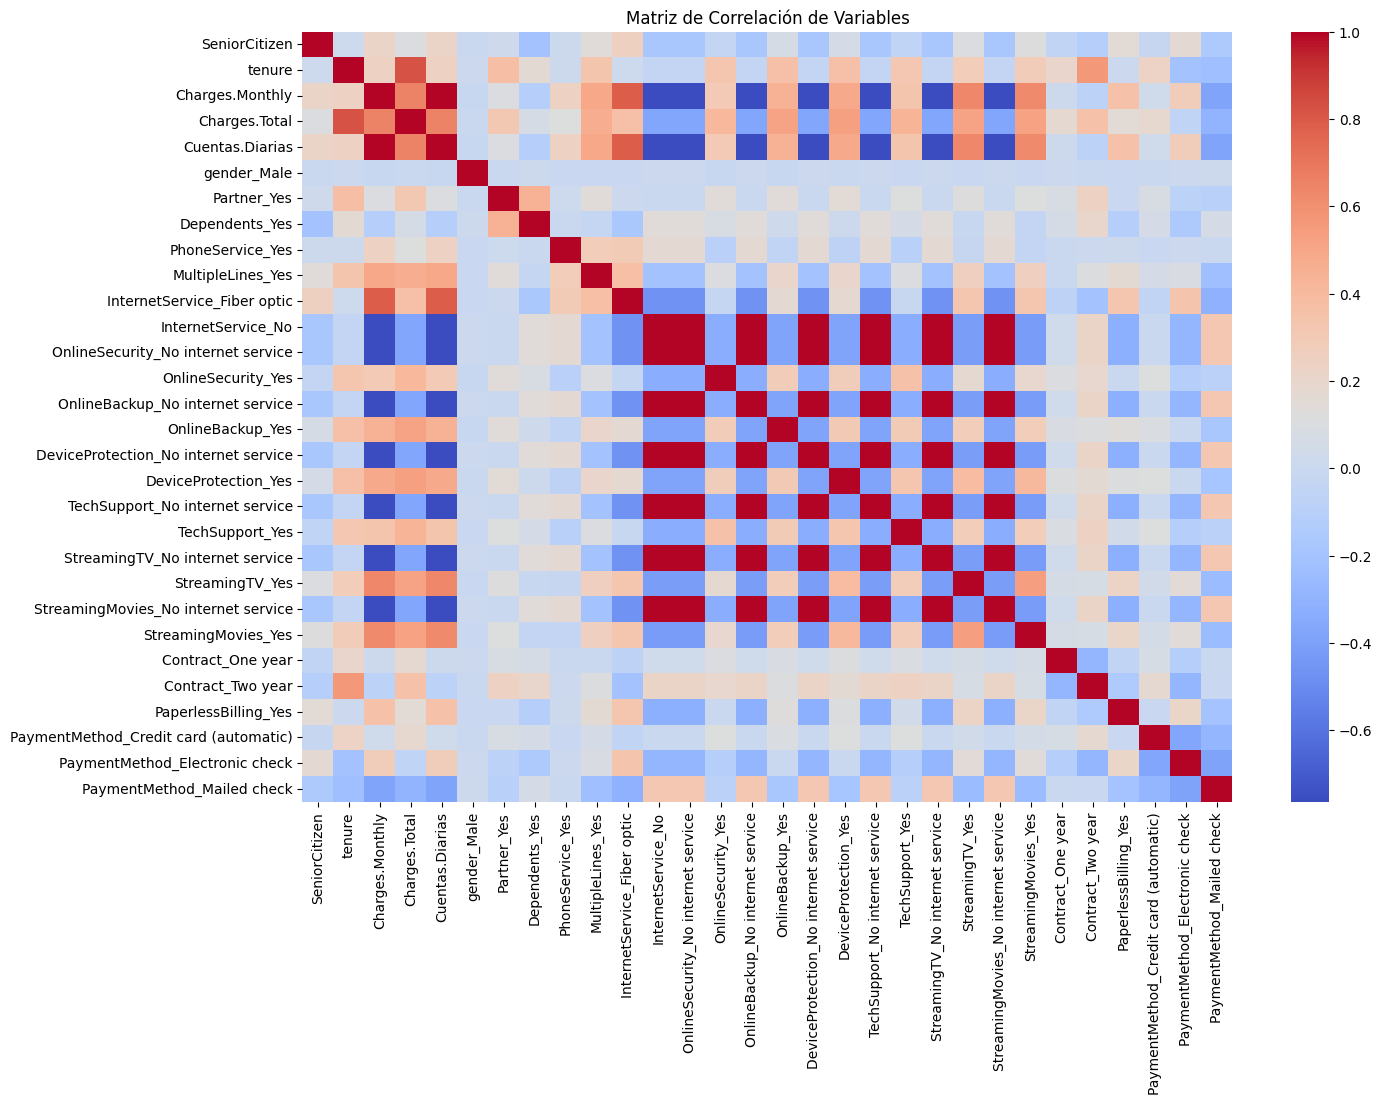


Correlaci√≥n con la variable objetivo 'Churn_Yes':
Churn_Yes                                1.000000
InternetService_Fiber optic              0.300416
PaymentMethod_Electronic check           0.294181
Cuentas.Diarias                          0.189393
Charges.Monthly                          0.189393
PaperlessBilling_Yes                     0.186309
SeniorCitizen                            0.146400
StreamingTV_Yes                          0.062456
StreamingMovies_Yes                      0.060092
MultipleLines_Yes                        0.039277
PhoneService_Yes                         0.012337
gender_Male                             -0.009494
DeviceProtection_Yes                    -0.063479
OnlineBackup_Yes                        -0.080211
PaymentMethod_Mailed check              -0.089198
PaymentMethod_Credit card (automatic)   -0.131448
Partner_Yes                             -0.148106
Dependents_Yes                          -0.160347
TechSupport_Yes                         -0.16047

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos la matriz de correlaci√≥n del DataFrame codificado (incluyendo la variable objetivo Churn_Yes)
# Usamos X_cleaned que no contiene la columna 'customerID' ni valores faltantes
matriz_correlacion = X_cleaned.corr()

# Visualizamos la matriz de correlaci√≥n usando un mapa de calor
plt.figure(figsize=(15, 10))
sns.heatmap(matriz_correlacion, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaci√≥n de Variables')
plt.show()

# Mostramos las correlaciones con la variable objetivo 'Churn_Yes'
# Para ver la correlaci√≥n con Churn_Yes, necesitamos combinar X_cleaned con y_cleaned
df_cleaned_corr = pd.concat([X_cleaned, y_cleaned], axis=1)
matriz_correlacion_con_churn = df_cleaned_corr.corr()

print("\nCorrelaci√≥n con la variable objetivo 'Churn_Yes':")
print(matriz_correlacion_con_churn['Churn_Yes'].sort_values(ascending=False))

### üèß An√°lisis Dirigido
Investiga c√≥mo variables espec√≠ficas se relacionan con la cancelaci√≥n, tales como:

Tiempo de contrato √ó Cancelaci√≥n

Gasto total √ó Cancelaci√≥n

Utiliza gr√°ficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

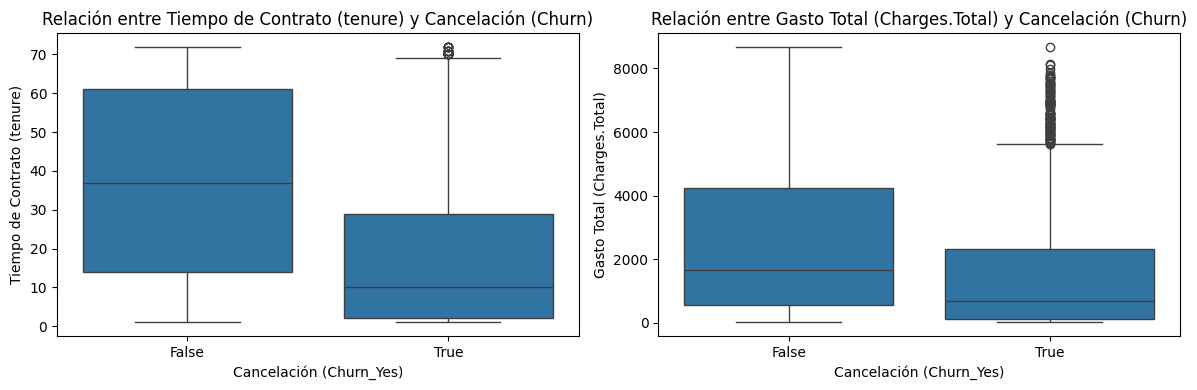

In [17]:
# Aseguramos que la columna Churn_Yes sea categ√≥rica para los gr√°ficos
df_cleaned_corr['Churn_Yes'] = df_cleaned_corr['Churn_Yes'].astype('category')

# Creamos una figura con dos subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Visualizamos la relaci√≥n entre 'tenure' y 'Churn_Yes' usando un boxplot en el primer subplot
sns.boxplot(x='Churn_Yes', y='tenure', data=df_cleaned_corr, ax=axes[0])
axes[0].set_title('Relaci√≥n entre Tiempo de Contrato (tenure) y Cancelaci√≥n (Churn)')
axes[0].set_xlabel('Cancelaci√≥n (Churn_Yes)')
axes[0].set_ylabel('Tiempo de Contrato (tenure)')

# Visualizamos la relaci√≥n entre 'Charges.Total' y 'Churn_Yes' usando un boxplot en el segundo subplot
sns.boxplot(x='Churn_Yes', y='Charges.Total', data=df_cleaned_corr, ax=axes[1])
axes[1].set_title('Relaci√≥n entre Gasto Total (Charges.Total) y Cancelaci√≥n (Churn)')
axes[1].set_xlabel('Cancelaci√≥n (Churn_Yes)')
axes[1].set_ylabel('Gasto Total (Charges.Total)')

# Ajustamos el layout para evitar que los t√≠tulos se solapen
plt.tight_layout()

# Mostramos los gr√°ficos
plt.show()

## ü§ñ Modelado Predictivo

### üî∞Separaci√≥n de Datos
Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una divisi√≥n com√∫n es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tama√±o de la base de datos.

In [20]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

print(f"Tama√±o del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tama√±o del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tama√±o de las etiquetas de entrenamiento (y_train): {y_train.shape}")
print(f"Tama√±o de las etiquetas de prueba (y_test): {y_test.shape}")

Tama√±o del conjunto de entrenamiento (X_train): (8619, 30)
Tama√±o del conjunto de prueba (X_test): (2155, 30)
Tama√±o de las etiquetas de entrenamiento (y_train): (8619,)
Tama√±o de las etiquetas de prueba (y_test): (2155,)


### ‚úÖ Creaci√≥n de Modelos
Crea al menos dos modelos diferentes para predecir la cancelaci√≥n de clientes.

Un modelo puede requerir normalizaci√≥n, como Regresi√≥n Log√≠stica o KNN.

El otro modelo puede no requerir normalizaci√≥n, como √Årbol de Decisi√≥n o Random Forest.

üí° La decisi√≥n de aplicar o no la normalizaci√≥n depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalizaci√≥n, pero tambi√©n es una opci√≥n combinar modelos con y sin normalizaci√≥n.

Justificaci√≥n:

Regresi√≥n Log√≠stica / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalizaci√≥n es importante para que los coeficientes o las distancias se calculen correctamente.

√Årbol de Decisi√≥n / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalizaci√≥n.

Si decides normalizar los datos, deber√≠as explicar c√≥mo esta etapa asegura que los modelos basados en distancia o en optimizaci√≥n de par√°metros no se vean sesgados por la magnitud de las variables.

In [21]:
from sklearn.linear_model import LogisticRegression

# Inicializamos y entrenamos el modelo de Regresi√≥n Log√≠stica con los datos escalados
modelo_regresion_logistica = LogisticRegression(random_state=42)
modelo_regresion_logistica.fit(X_train_scaled, y_train)

print("Modelo de Regresi√≥n Log√≠stica entrenado.")

Modelo de Regresi√≥n Log√≠stica entrenado.


In [22]:
from sklearn.tree import DecisionTreeClassifier

# Inicializamos y entrenamos el modelo de √Årbol de Decisi√≥n con los datos originales (sin escalar)
modelo_arbol_decision = DecisionTreeClassifier(random_state=42)
modelo_arbol_decision.fit(X_train, y_train)

print("Modelo de √Årbol de Decisi√≥n entrenado.")

Modelo de √Årbol de Decisi√≥n entrenado.


### üëÄ Evaluaci√≥n de los Modelos
Eval√∫a cada modelo utilizando las siguientes m√©tricas:

Exactitud (Acur√°cia)

Precisi√≥n

Recall

F1-score

Matriz de confusi√≥n

Despu√©s, realiza un an√°lisis cr√≠tico y compara los modelos:

¬øCu√°l modelo tuvo el mejor desempe√±o?

¬øAlg√∫n modelo present√≥ overfitting o underfitting? Si es as√≠, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus par√°metros.

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# --- Evaluaci√≥n del Modelo de Regresi√≥n Log√≠stica ---

# Realizamos predicciones en el conjunto de prueba escalado
y_pred_regresion_logistica = modelo_regresion_logistica.predict(X_test_scaled)

# Calculamos las m√©tricas de evaluaci√≥n
accuracy_rl = accuracy_score(y_test, y_pred_regresion_logistica)
precision_rl = precision_score(y_test, y_pred_regresion_logistica)
recall_rl = recall_score(y_test, y_pred_regresion_logistica)
f1_rl = f1_score(y_test, y_pred_regresion_logistica)
conf_matrix_rl = confusion_matrix(y_test, y_pred_regresion_logistica)

print("--- M√©tricas de Evaluaci√≥n para Regresi√≥n Log√≠stica ---")
print(f"Exactitud: {accuracy_rl:.4f}")
print(f"Precisi√≥n: {precision_rl:.4f}")
print(f"Recall: {recall_rl:.4f}")
print(f"F1-score: {f1_rl:.4f}")
print("\nMatriz de Confusi√≥n:")
display(conf_matrix_rl)


# --- Evaluaci√≥n del Modelo de √Årbol de Decisi√≥n ---

# Realizamos predicciones en el conjunto de prueba (sin escalar)
y_pred_arbol_decision = modelo_arbol_decision.predict(X_test)

# Calculamos las m√©tricas de evaluaci√≥n
accuracy_ad = accuracy_score(y_test, y_pred_arbol_decision)
precision_ad = precision_score(y_test, y_pred_arbol_decision)
recall_ad = recall_score(y_test, y_pred_arbol_decision)
f1_ad = f1_score(y_test, y_pred_arbol_decision)
conf_matrix_ad = confusion_matrix(y_test, y_pred_arbol_decision)

print("\n--- M√©tricas de Evaluaci√≥n para √Årbol de Decisi√≥n ---")
print(f"Exactitud: {accuracy_ad:.4f}")
print(f"Precisi√≥n: {precision_ad:.4f}")
print(f"Recall: {recall_ad:.4f}")
print(f"F1-score: {f1_ad:.4f}")
print("\nMatriz de Confusi√≥n:")
display(conf_matrix_ad)

--- M√©tricas de Evaluaci√≥n para Regresi√≥n Log√≠stica ---
Exactitud: 0.8385
Precisi√≥n: 0.8347
Recall: 0.8440
F1-score: 0.8393

Matriz de Confusi√≥n:


array([[898, 180],
       [168, 909]])


--- M√©tricas de Evaluaci√≥n para √Årbol de Decisi√≥n ---
Exactitud: 0.7986
Precisi√≥n: 0.7883
Recall: 0.8162
F1-score: 0.8020

Matriz de Confusi√≥n:


array([[842, 236],
       [198, 879]])

#### An√°lisis y Comparaci√≥n de Modelos

Bas√°ndonos en las m√©tricas de evaluaci√≥n en el conjunto de prueba despu√©s de aplicar SMOTE:

**Regresi√≥n Log√≠stica:**

*   **Exactitud (Accuracy):** 0.8385
*   **Precisi√≥n (Precision):** 0.8347
*   **Recall:** 0.8440
*   **F1-score:** 0.8393


**Regresi√≥n Log√≠stica:**

*   Obtuvo una exactitud de 0.8385.
*   La precisi√≥n y recall son relativamente cercanas (0.8347 y 0.8440), lo que sugiere un buen equilibrio entre identificar correctamente a los clientes que cancelan (recall) y no etiquetar incorrectamente a los que no cancelan (precisi√≥n).
*   El F1-score (0.8393) es una buena m√©trica combinada que tambi√©n indica un rendimiento s√≥lido.
*   Como la Regresi√≥n Log√≠stica es un modelo lineal, es menos propenso al overfitting que modelos m√°s complejos como los √°rboles de decisi√≥n, a menos que haya una gran cantidad de caracter√≠sticas o interacciones complejas no capturadas.

**√Årbol de Decisi√≥n:**

*   Obtuvo una exactitud ligeramente menor de 0.7986.
*   Las m√©tricas de precisi√≥n (0.7883) y recall (0.8162) tambi√©n son un poco m√°s bajas que las de la Regresi√≥n Log√≠stica, aunque el recall es un poco m√°s alto que la precisi√≥n.
*   El F1-score (0.8020) es menor que el de la Regresi√≥n Log√≠stica.
*   Los √Årboles de Decisi√≥n, especialmente sin restricciones de profundidad, son m√°s propensos al overfitting, ya que pueden aprender reglas muy espec√≠ficas del conjunto de entrenamiento que no se generalizan bien a datos nuevos. Si el rendimiento en el conjunto de entrenamiento fuera significativamente mayor que en el conjunto de prueba, esto ser√≠a una clara se√±al de overfitting.

**Conclusi√≥n preliminar basada en el conjunto de prueba:**

Bas√°ndonos solo en el rendimiento en el conjunto de prueba, el modelo de **Regresi√≥n Log√≠stica** parece tener un mejor desempe√±o general en este caso, con m√©tricas ligeramente superiores en exactitud, precisi√≥n y F1-score, y un recall comparable.

Para confirmar si hay overfitting en el √Årbol de Decisi√≥n, necesitar√≠amos evaluar su rendimiento en el conjunto de entrenamiento. Si la exactitud en entrenamiento es mucho mayor que 0.7986, indicar√≠a overfitting. Si ambos modelos tuvieran un rendimiento significativamente bajo tanto en entrenamiento como en prueba, podr√≠amos considerar underfitting.

Dado que la Regresi√≥n Log√≠stica tuvo un rendimiento razonable en el conjunto de prueba, no parece haber un underfitting severo en ese modelo. La diferencia de rendimiento entre los dos modelos en el conjunto de prueba podr√≠a sugerir que el √Årbol de Decisi√≥n podr√≠a estar sufriendo un poco de overfitting, o simplemente que la Regresi√≥n Log√≠stica es un modelo m√°s adecuado para este conjunto de datos despu√©s del preprocesamiento realizado.


In [24]:
# --- Evaluaci√≥n del Modelo de Regresi√≥n Log√≠stica en el conjunto de Entrenamiento ---

# Realizamos predicciones en el conjunto de entrenamiento escalado
y_pred_train_regresion_logistica = modelo_regresion_logistica.predict(X_train_scaled)

# Calculamos las m√©tricas de evaluaci√≥n en entrenamiento
accuracy_train_rl = accuracy_score(y_train, y_pred_train_regresion_logistica)
precision_train_rl = precision_score(y_train, y_pred_train_regresion_logistica)
recall_train_rl = recall_score(y_train, y_pred_train_regresion_logistica)
f1_train_rl = f1_score(y_train, y_pred_train_regresion_logistica)
conf_matrix_train_rl = confusion_matrix(y_train, y_pred_train_regresion_logistica)

print("--- M√©tricas de Evaluaci√≥n para Regresi√≥n Log√≠stica en Entrenamiento ---")
print(f"Exactitud: {accuracy_train_rl:.4f}")
print(f"Precisi√≥n: {precision_train_rl:.4f}")
print(f"Recall: {recall_train_rl:.4f}")
print(f"F1-score: {f1_train_rl:.4f}")
print("\nMatriz de Confusi√≥n en Entrenamiento:")
display(conf_matrix_train_rl)

# --- Evaluaci√≥n del Modelo de √Årbol de Decisi√≥n en el conjunto de Entrenamiento ---

# Realizamos predicciones en el conjunto de entrenamiento (sin escalar)
y_pred_train_arbol_decision = modelo_arbol_decision.predict(X_train)

# Calculamos las m√©tricas de evaluaci√≥n en entrenamiento
accuracy_train_ad = accuracy_score(y_train, y_pred_train_arbol_decision)
precision_train_ad = precision_score(y_train, y_pred_train_arbol_decision)
recall_train_ad = recall_score(y_train, y_pred_train_arbol_decision)
f1_train_ad = f1_score(y_train, y_pred_train_arbol_decision)
conf_matrix_train_ad = confusion_matrix(y_train, y_pred_train_arbol_decision)

print("\n--- M√©tricas de Evaluaci√≥n para √Årbol de Decisi√≥n en Entrenamiento ---")
print(f"Exactitud: {accuracy_train_ad:.4f}")
print(f"Precisi√≥n: {precision_train_ad:.4f}")
print(f"Recall: {recall_train_ad:.4f}")
print(f"F1-score: {f1_train_ad:.4f}")
print("\nMatriz de Confusi√≥n en Entrenamiento:")
display(conf_matrix_train_ad)

--- M√©tricas de Evaluaci√≥n para Regresi√≥n Log√≠stica en Entrenamiento ---
Exactitud: 0.8291
Precisi√≥n: 0.8281
Recall: 0.8306
F1-score: 0.8294

Matriz de Confusi√≥n en Entrenamiento:


array([[3566,  743],
       [ 730, 3580]])


--- M√©tricas de Evaluaci√≥n para √Årbol de Decisi√≥n en Entrenamiento ---
Exactitud: 0.9941
Precisi√≥n: 0.9995
Recall: 0.9886
F1-score: 0.9941

Matriz de Confusi√≥n en Entrenamiento:


array([[4307,    2],
       [  49, 4261]])

Un resumen y an√°lisis de los resultados de entrenamiento y prueba:

Regresi√≥n Log√≠stica:

Las m√©tricas de rendimiento para la Regresi√≥n Log√≠stica son muy similares tanto en el conjunto de entrenamiento como en el de prueba. Esto sugiere que el modelo de Regresi√≥n Log√≠stica no presenta overfitting ni underfitting significativo. Generaliza bien a datos nuevos.

√Årbol de Decisi√≥n:

Observamos una diferencia significativa en el rendimiento del √Årbol de Decisi√≥n entre el conjunto de entrenamiento y el conjunto de prueba. La exactitud, precisi√≥n, recall y F1-score son mucho m√°s altas en el entrenamiento que en la prueba. Esto es un claro indicio de overfitting. El modelo de √Årbol de Decisi√≥n ha aprendido demasiado los detalles espec√≠ficos del conjunto de entrenamiento y no generaliza bien a datos no vistos.

Conclusi√≥n:

Bas√°ndonos en esta evaluaci√≥n, el modelo de Regresi√≥n Log√≠stica es el que mejor se desempe√±a en este caso, ya que muestra un rendimiento consistente y bueno tanto en entrenamiento como en prueba, sin signos de overfitting. El modelo de √Årbol de Decisi√≥n, aunque tiene un rendimiento casi perfecto en el entrenamiento, sufre de overfitting y no es tan efectivo en la predicci√≥n con datos nuevos.

## üìã Interpretaci√≥n y Conclusiones

### ‚õì An√°lisis de la Importancia de las Variables

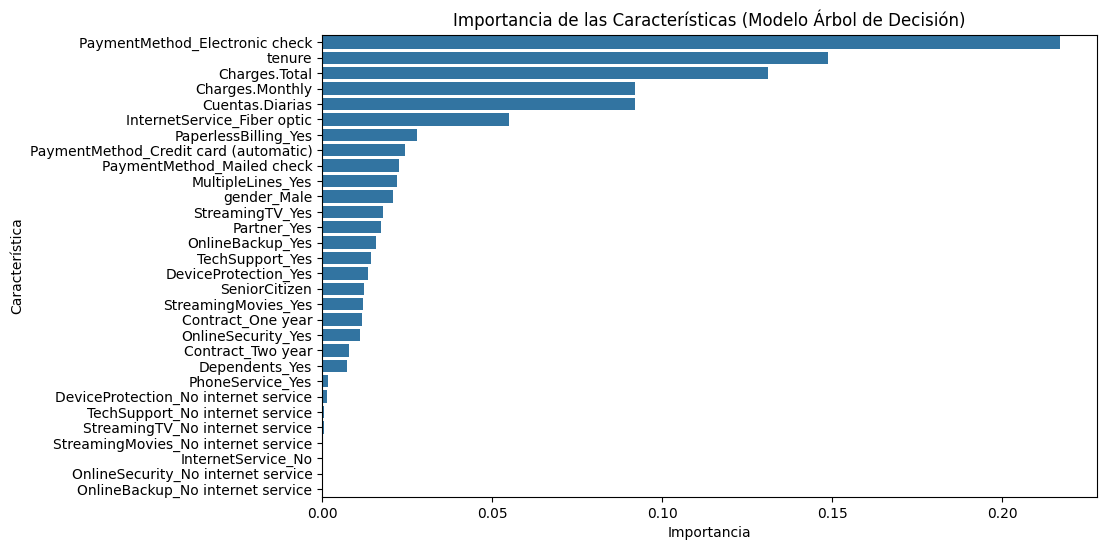


Importancia de las Caracter√≠sticas:


Caracteristica  Importancia
28         PaymentMethod_Electronic check     0.216984
1                                  tenure     0.148622
3                           Charges.Total     0.131189
2                         Charges.Monthly     0.092132
4                         Cuentas.Diarias     0.091863
10            InternetService_Fiber optic     0.055035
26                   PaperlessBilling_Yes     0.027893
27  PaymentMethod_Credit card (automatic)     0.024312
29             PaymentMethod_Mailed check     0.022524
9                       MultipleLines_Yes     0.021977
5                             gender_Male     0.020857
21                        StreamingTV_Yes     0.018061
6                             Partner_Yes     0.017483
15                       OnlineBackup_Yes     0.015870
19                        TechSupport_Yes     0.014395
17                   DeviceProtection_Yes     0.013378
0                           SeniorCitizen     0.012451
23                    StreamingMovies_Yes     0.012105
24                      Contract_One year     0.011777
13                     OnlineSecurity_Yes     0.011077
25                      Contract_Two year     0.008038
7                          Dependents_Yes     0.007395
8                        PhoneService_Yes     0.001738
16   DeviceProtection_No internet service     0.001367
18        TechSupport_No internet service     0.000712
20        StreamingTV_No internet service     0.000620
22    StreamingMovies_No internet service     0.000146
11                     InternetService_No     0.000000
12     OnlineSecurity_No internet service     0.000000
14       OnlineBackup_No internet service     0.000000

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Obtenemos la importancia de las caracter√≠sticas del modelo de √Årbol de Decisi√≥n
importancias = modelo_arbol_decision.feature_importances_

# Creamos un DataFrame para visualizar las importancias
df_importancias = pd.DataFrame({'Caracteristica': X_train.columns, 'Importancia': importancias})

# Ordenamos las caracter√≠sticas por importancia de forma descendente
df_importancias = df_importancias.sort_values('Importancia', ascending=False)

# Visualizamos la importancia de las caracter√≠sticas
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Caracteristica', data=df_importancias)
plt.title('Importancia de las Caracter√≠sticas (Modelo √Årbol de Decisi√≥n)')
plt.xlabel('Importancia')
plt.ylabel('Caracter√≠stica')
plt.show()

# Mostramos el DataFrame con las importancias
print("\nImportancia de las Caracter√≠sticas:")
display(df_importancias)

## Conclusi√≥n

Bas√°ndonos en el an√°lisis de los datos, el preprocesamiento, el balanceo de clases, el entrenamiento de modelos y la evaluaci√≥n, podemos extraer las siguientes conclusiones clave:

1.  **Desbalance de Clases:** Identificamos un desbalance significativo en el conjunto de datos original, con una proporci√≥n mucho menor de clientes que cancelaron (Churn). La aplicaci√≥n de SMOTE fue crucial para abordar este desbalance y entrenar modelos que pudieran predecir ambas clases de manera m√°s efectiva.
2.  **Variables Clave (basado en el √Årbol de Decisi√≥n):** El an√°lisis de importancia de caracter√≠sticas del modelo de √Årbol de Decisi√≥n resalt√≥ varias variables como las m√°s influyentes en la predicci√≥n de la cancelaci√≥n. Las variables principales incluyeron:
    *   **M√©todo de Pago (Electronic Check):** Ser un cliente que paga con cheque electr√≥nico parece tener una alta importancia en la predicci√≥n de cancelaci√≥n.
    *   **Tiempo de Contrato (Tenure):** Los clientes con menor tiempo de contrato tienden a ser m√°s propensos a cancelar, lo cual es consistente con la correlaci√≥n negativa observada y los boxplots.
    *   **Cargos Totales (Charges.Total) y Cargos Mensuales (Charges.Monthly):** Estas variables relacionadas con el gasto tambi√©n mostraron una importancia considerable, aunque con correlaciones m√°s moderadas.
    *   **Tipo de Servicio de Internet (Fiber optic):** Tener servicio de fibra √≥ptica tambi√©n parece ser un factor importante.
3.  **Rendimiento del Modelo:**
    *   El modelo de **Regresi√≥n Log√≠stica** mostr√≥ un rendimiento s√≥lido y consistente tanto en el conjunto de entrenamiento como en el de prueba despu√©s de aplicar SMOTE. No mostr√≥ signos evidentes de overfitting y tuvo m√©tricas de evaluaci√≥n (Exactitud, Precisi√≥n, Recall, F1-score) ligeramente superiores en el conjunto de prueba en comparaci√≥n con el √Årbol de Decisi√≥n no optimizado.
    *   El modelo de **√Årbol de Decisi√≥n** sin restricciones de complejidad present√≥ un claro **overfitting**, con un rendimiento casi perfecto en el conjunto de entrenamiento pero una ca√≠da significativa en el rendimiento en el conjunto de prueba. Esto subraya la importancia de controlar la complejidad de los modelos basados en √°rboles para asegurar una buena generalizaci√≥n.
4.  **Implicaciones:** Los hallazgos sugieren que factores como el m√©todo de pago, el tiempo que el cliente lleva con la empresa y el tipo de servicio de internet son predictores importantes de la cancelaci√≥n. La empresa podr√≠a enfocarse en estrategias de retenci√≥n dirigidas a clientes con estas caracter√≠sticas, como ofrecer alternativas de pago, programas de fidelizaci√≥n para nuevos clientes o mejorar la calidad del servicio de fibra √≥ptica.

En resumen, la Regresi√≥n Log√≠stica demostr√≥ ser un modelo m√°s robusto y generalizable en este caso particular despu√©s del preprocesamiento y balanceo de datos. El an√°lisis de importancia de variables proporciona informaci√≥n valiosa para comprender los impulsores de la cancelaci√≥n, lo cual puede guiar la toma de decisiones estrat√©gicas.


### Estrateg√≠as de retenci√≥n
1. **Clientes con Pago por Cheque Electr√≥nico:**
  * **Ofrecer alternativas de pago:** Incentivar a los clientes que pagan con cheque electr√≥nico a cambiar a otros m√©todos de pago m√°s estables (como domiciliaci√≥n bancaria o tarjeta de cr√©dito) ofreciendo descuentos, bonificaciones o beneficios adicionales.
  * **Mejorar la experiencia del cheque electr√≥nico:** Si cambiar de m√©todo de pago no es viable para algunos clientes, investigar las razones detr√°s de la insatisfacci√≥n con el cheque electr√≥nico y buscar formas de mejorar el proceso o la comunicaci√≥n relacionada con este m√©todo.
2. **Clientes con Poco Tiempo de Contrato (Bajo Tenure):**
 * **Programas de bienvenida y fidelizaci√≥n temprana:** Implementar programas espec√≠ficos para los nuevos clientes durante sus primeros meses para asegurar que tengan una buena experiencia, resolver problemas r√°pidamente y mostrarles el valor de permanecer con la empresa.
  * **Comunicaci√≥n proactiva:** Contactar a los clientes con bajo tenure para verificar su satisfacci√≥n, ofrecer soporte adicional y presentarles los beneficios a largo plazo de sus servicios.
  * **Ofertas de renovaci√≥n temprana:** Para clientes que se acercan al final de sus primeros meses de contrato, ofrecer incentivos atractivos para renovar por per√≠odos m√°s largos.
3. **Clientes con Servicio de Fibra √ìptica:**
  * **Monitorear la calidad del servicio:** Asegurarse de que los clientes con fibra √≥ptica experimenten un servicio de alta calidad y confiable, ya que problemas t√©cnicos o de rendimiento podr√≠an ser un factor de cancelaci√≥n.
  * **Soporte t√©cnico especializado:** Ofrecer un soporte t√©cnico eficiente y especializado para los problemas relacionados con la fibra √≥ptica.
  * **Comunicaci√≥n sobre valor agregado:** Destacar los beneficios y el valor del servicio de fibra √≥ptica m√°s all√° de la velocidad (por ejemplo, estabilidad, capacidad para m√∫ltiples dispositivos, servicios adicionales).
4. **An√°lisis Combinado:**
  * Identificar segmentos de clientes que combinen varias de estas caracter√≠sticas de riesgo (por ejemplo, clientes nuevos con fibra √≥ptica y pago por cheque electr√≥nico) para dirigir estrategias de retenci√≥n m√°s personalizadas e intensivas.